In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
import tensorflow as tf

# Descargue manualmente el modelo y colóquelo en el directorio C: \ Users \ nombre de usuario \ .keras \ models, la dirección de descarga es la siguiente:
# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5
# https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

# Cargar modelo e imprimir
model = VGG16()
print(model.summary())


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

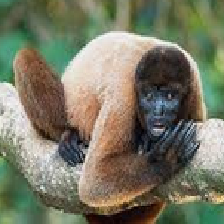

In [35]:
# Cargar una imagen de prueba
#image = load_img("tigre.jpg", target_size=(224, 224))
# trigre.jpg, cebras.jpg, gato03.jpg, violin.png, panda.png, leon.png
image = load_img("mono.png", target_size=(224, 224))

image

In [36]:
  # Convertir a matriz
image = img_to_array(image)
print("Imagen convertida en matriz --> ", image.shape)

  # Reformar en 4D
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
print("Imagen en 4D --> ", image.shape)

  # Imagen de preproceso   
image = preprocess_input(image)
print("Resultado del preprocesamiento --> ", image.shape)

  # Pronóstico
predict_result = model.predict(image)

  # Resultados de predicción de análisis
label = decode_predictions(predict_result)
label

Imagen convertida en matriz -->  (224, 224, 3)
Imagen en 4D -->  (1, 224, 224, 3)
Resultado del preprocesamiento -->  (1, 224, 224, 3)


[[('n02492660', 'howler_monkey', 0.61502266),
  ('n02493509', 'titi', 0.2088245),
  ('n02480495', 'orangutan', 0.052721668),
  ('n02480855', 'gorilla', 0.02531894),
  ('n02493793', 'spider_monkey', 0.014127421)]]

In [4]:
  # Imprima las tres categorías con mayor probabilidad
for idx in range(0, 3):
          print ("Categoría:% s Probabilidad:% 0.4f"% (label[0][idx][1], label[0][idx][2]))

# Limpiar
#tf.keras.backend.clear_session()


# ""

Categoría:violin Probabilidad: 0.5421
Categoría:cello Probabilidad: 0.3455
Categoría:flute Probabilidad: 0.0225
